In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("students_raw.csv")
df.head()

,MaSV,Lop,GioiTinh,DiemGiuaKy,DiemCuoiKy
0,SV1000,B1,nam,8.0,15.0
1,SV1001,B2,F,-2.0,8.7
2,SV1002,A1,male,6.3,5.4
3,SV1003,B1,female,5.9,6.1
4,SV1004,B1,nam,3.5,6.0


In [3]:
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MaSV        50 non-null     object 
 1   Lop         50 non-null     object 
 2   GioiTinh    50 non-null     object 
 3   DiemGiuaKy  45 non-null     float64
 4   DiemCuoiKy  45 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.1+ KB


,DiemGiuaKy,DiemCuoiKy
count,45.000000,45.000000
mean,6.357778,6.891111
std,2.241701,2.359008
min,-2.000000,3.000000
25%,5.400000,5.200000
50%,6.400000,6.700000
75%,8.000000,8.000000
max,9.600000,15.000000


In [4]:
# Chuẩn hóa giới tính
df['GioiTinh'] = df['GioiTinh'].str.strip().str.lower()
df['GioiTinh'] = df['GioiTinh'].replace({
    'nam':'Nam','male':'Nam','m':'Nam',
    'nữ':'Nữ','nu':'Nữ','female':'Nữ','f':'Nữ'
})

In [5]:
# Điền giá trị thiếu bằng mean
df['DiemGiuaKy'] = df['DiemGiuaKy'].fillna(df['DiemGiuaKy'].mean())
df['DiemCuoiKy'] = df['DiemCuoiKy'].fillna(df['DiemCuoiKy'].mean())

In [6]:
# Loại bỏ trùng lặp
df = df.drop_duplicates()

In [7]:
# Trung bình điểm cuối kỳ theo lớp
print(df.groupby("Lop")["DiemCuoiKy"].mean())


Lop
A1    7.308222
A2    5.790101
B1    6.614017
B2    7.612500
Name: DiemCuoiKy, dtype: float64


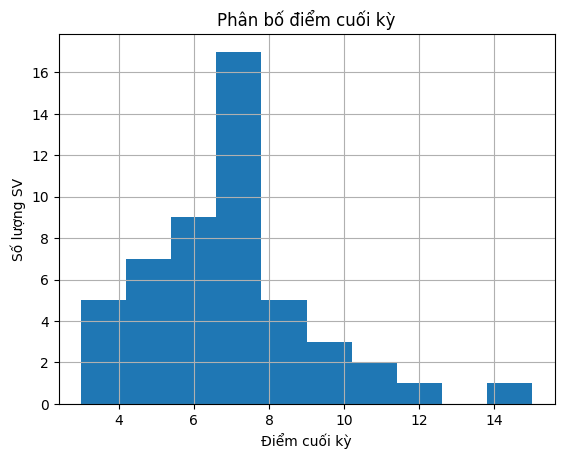

In [8]:
# Vẽ histogram điểm cuối kỳ
df['DiemCuoiKy'].hist(bins=10)
plt.xlabel("Điểm cuối kỳ")
plt.ylabel("Số lượng SV")
plt.title("Phân bố điểm cuối kỳ")
plt.show()

In [9]:
df.to_csv("students_clean.csv", index=False)
print("Đã lưu dữ liệu đã làm sạch vào students_clean.csv")

Đã lưu dữ liệu đã làm sạch vào students_clean.csv
